In [1]:
#package for creating, simulation of room and implementations for DOA algorithms
import pyroomacoustics as pra
from pyroomacoustics.doa import circ_dist

#package for audio display and load
import librosa
import librosa.display

#package for display of Matlab-like-graphs 
import matplotlib.pyplot as plt

#package for mathematical use 
import numpy as np

#package for signal processing 
from scipy.signal import fftconvolve


import math
import IPython.display as ipd

# Parameters 


In [2]:
#  parameters
SNR = 0.0  # signal-to-noise ratio
c = 343.0  # speed of sound
nfft = 256  # FFT size
freq_bins = np.arange(5, 60)  # FFT bins to use for estimation
distance = 3  #in meters
microphone= .02  #in meters
samplerate= 16000
x_mic, y_mic, x_source, y_source=3, 5, 6, 6
fs=16000
#fs = 880
length = 10

# creating the room

In [3]:
# compute the noise variance
sigma2 = 10 ** (-SNR / 10) / (4.0 * np.pi * distance) ** 2

In [4]:
# Create an anechoic room
room_dim = np.r_[10.0, 10.0]
#aroom = pra.ShoeBox(room_dim, fs=fs, max_order=0, sigma2_awgn=sigma2)
aroom = pra.ShoeBox(room_dim,fs=samplerate, max_order=10,sigma2_awgn=sigma2 )

# adding a source

## calculate angle from source to microphone function 

In [5]:
def calculate_angle(x_mic, y_mic, x_source, y_source):
    '''Calculate the angle between microphone and source givent the center of
    microphone and the coordinates of the source'''
    
    
    y=y_source-y_mic
    x=x_source-x_mic
    h = np.sqrt(x^2+y^2)
    angle=np.arcsin(y/h)
    
    return angle


In [6]:
azimuth=calculate_angle(x_mic, y_mic, x_source, y_source)

print(azimuth)


0.7853981633974482


In [7]:
#sr = 44100 
#fs = 880

#t = np.linspace(0, length, samplerate * length)  #  Produces a 10 second Audio-File
#y = np.sin(fs * 2 * np.pi * t) 

In [8]:
#ipd.Audio(y,rate=samplerate) 

In [9]:
#t = np.linspace(0, length, sampleRate * length)  #  Produces a 10 second Audio-File
#y = np.sin(frequency1 * 2 * np.pi * t) 

In [10]:
#ipd.Audio(y1,rate=sampleRate) 

In [11]:
y,fs = librosa.load('/Users/yeiry/S3D/street_traffic-lisbon-1076-43394.wav',sr=fs)
ipd.Audio('/Users/yeiry/S3D/street_traffic-lisbon-1076-43394.wav') 

# locating source 

In [12]:
source_location =[x_source,y_source ]
aroom.add_source(source_location, signal=y)

## locating the microphone 

In [13]:
mic = np.c_[

    
    [x_mic, y_mic-microphone/2],
    [x_mic, y_mic+microphone/2]
#1.41 1.59
]
aroom.add_microphone_array(mic)



In [14]:
# run the simulation
aroom.simulate()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

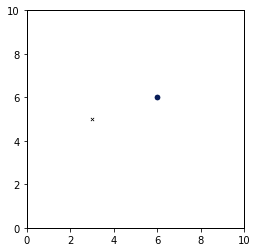

In [15]:
aroom.plot()

# Analysis 

In [16]:
X = np.array(
    [
        pra.transform.stft.analysis(signal, nfft, nfft // 2).T
        for signal in aroom.mic_array.signals
    ]
)
#frequencies 

['CSSM', 'MUSIC', 'NormMUSIC', 'SRP', 'TOPS', 'WAVES']


/Users/yeiry/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


CSSM
  Recovered azimuth: [270.] degrees
original azimuth: 44.99999999999999
  Error: [135.] degrees
MUSIC
  Recovered azimuth: [15.] degrees
original azimuth: 44.99999999999999
  Error: [30.] degrees


/Users/yeiry/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/yeiry/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/yeiry/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or

NormMUSIC
  Recovered azimuth: [90.] degrees
original azimuth: 44.99999999999999
  Error: [45.] degrees
SRP
  Recovered azimuth: [270.] degrees
original azimuth: 44.99999999999999
  Error: [135.] degrees


/Users/yeiry/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


TOPS
  Recovered azimuth: [90.] degrees
original azimuth: 44.99999999999999
  Error: [45.] degrees


/Users/yeiry/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


WAVES
  Recovered azimuth: [125.] degrees
original azimuth: 44.99999999999999
  Error: [80.] degrees


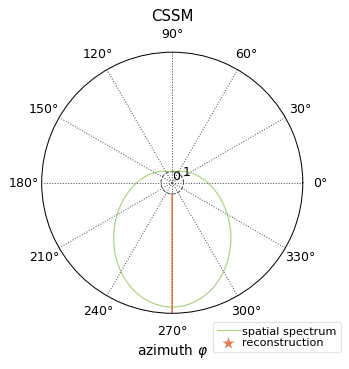

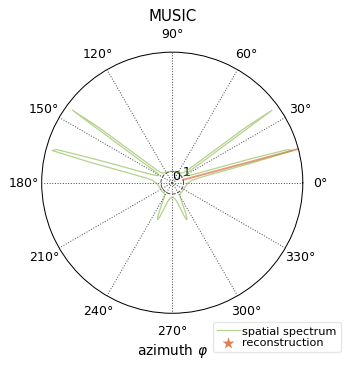

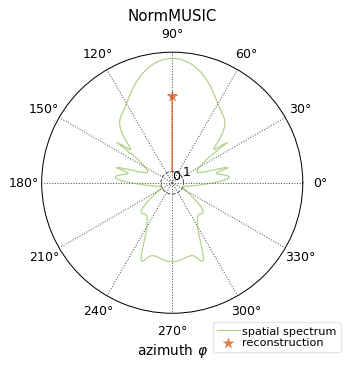

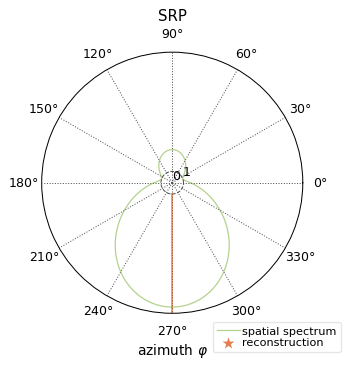

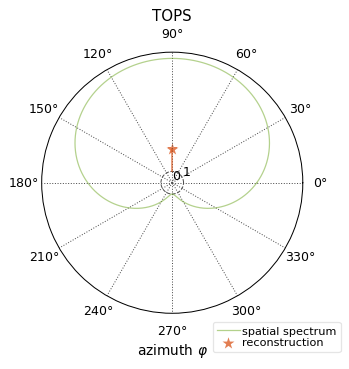

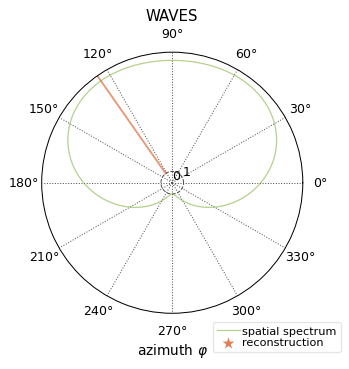

In [17]:
# Now we can test all the algorithms available
algo_names = sorted(pra.doa.algorithms.keys())
algo_names=['CSSM', 'MUSIC', 'NormMUSIC', 'SRP', 'TOPS', 'WAVES']
print(algo_names)
for algo_name in algo_names:
    # Construct the new DOA object
    # the max_four parameter is necessary for FRIDA only
    doa = pra.doa.algorithms[algo_name](mic, fs, nfft, c=c)

    # this call here perform localization on the frames in X
    doa.locate_sources(X, freq_bins=freq_bins)

    doa.polar_plt_dirac()
    plt.title(algo_name)
  
  
    
    # doa.azimuth_recon contains the reconstructed location of the source
    print(algo_name)
    print("  Recovered azimuth:", doa.azimuth_recon / np.pi * 180.0, "degrees")
    print("original azimuth:",azimuth/ np.pi * 180.0 )
   
    print("  Error:", circ_dist(azimuth, doa.azimuth_recon) / np.pi * 180.0, "degrees")

plt.show()